Comandi usati nel primo tutorial di straxferno

In [5]:
import straxen
st = straxen.contexts.xenonnt_online()

In [6]:
st.select_runs()

Checking data availability: 100%|██████████| 2/2 [01:28<00:00, 44.00s/it]


,name,number,mode,start,end,tags,livetime,tags.name,raw_records_available,peak_basics_available
0,007158,7158,xenonnt_commissioning_noise,2020-03-18 17:41:37.343,2020-03-18 17:42:43.982,,00:01:06.639000,NaN,True,False
1,007159,7159,xenonnt_commissioning_noise,2020-03-19 08:37:22.348,2020-03-19 08:38:41.183,,00:01:18.835000,NaN,True,False
2,007160,7160,xenonnt_commissioning_noise,2020-03-19 08:39:17.522,2020-03-19 08:40:48.522,,00:01:31,NaN,False,False
3,007161,7161,xenonnt_commissioning_noise,2020-03-19 08:41:12.806,2020-03-19 08:44:42.178,,00:03:29.372000,NaN,False,False
4,007162,7162,xenonnt_commissioning_pmtgain,2020-03-19 10:47:10.153,2020-03-19 10:50:39.279,messy,00:03:29.126000,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...
1111,008269,8269,xenonnt_selftrigger_commissioning_lowe,2020-06-17 06:18:46.474,2020-06-17 07:18:49.842,,01:00:03.368000,NaN,False,False
1112,008270,8270,xenonnt_selftrigger_commissioning_lowe,2020-06-17 07:19:15.962,2020-06-17 08:02:34.001,,00:43:18.039000,NaN,False,False
1113,008271,8271,xenonnt_selftrigger_commissioning_lowe,2020-06-17 08:14:41.658,2020-06-17 08:14:46.670,bad,00:00:05.012000,NaN,False,False
1114,008272,8272,xenonnt_selftrigger_commissioning_lowe,2020-06-17 08:21:12.609,2020-06-17 08:21:17.620,messy,00:00:05.011000,NaN,False,False


Per trovare un run si può cercare nel run database DAQ di XENON https://xenon1t-daq.lngs.infn.it, ma io non riesco ad entrarci.
Per selezionare il run si deve inserire il run name che è una stringa. Si possono controllare le dimensioni in mb con il comando size_mb.

In [22]:
run_id = '007695'
st.size_mb(run_id,'raw_records')

116145.769

Per scrivere le informazioni del metadata (scrivendo qualcosa e poi tab ti suggerisce come completare).

In [ ]:
st.get_metadata(run_id,'raw_records')

Per prendere un run c'è il comando get_array, prendiamo i primi 2 secondi del run o quello che vogliamo. Con il comando st.get_array? si capisce come usare questa funzione

In [14]:
r = st.get_array(run_id,'raw_records',seconds_range=(50,52))
r.nbytes/1e6

64.516528

In [ ]:
for r in st.get_iter(run_id, 'raw_records'):
    print(len(r))

Per selezionare un run si può usare anche la funzione get_iter, si usa con un loop for che va nei vari chunck. Ci mette un po' di tempo perché il run è grande

In [24]:
r, type(r)

([007695.raw_records: 1589187440sec 20750 ns - 1589187445sec 500025450 ns, 726585 items, 32.2 MB/s],
 strax.chunk.Chunk)

In [19]:
r.data['channel']

array([407,   3, 344, ..., 102, 199, 471], dtype=int16)

In [21]:
r.start, r.end

(1589187440000020750, 1589187445500025450)

(array([65272., 56784., 73156., 62153., 64962., 68358., 92113., 70597.,
        96913., 76277.]),
 array([  0. ,  49.3,  98.6, 147.9, 197.2, 246.5, 295.8, 345.1, 394.4,
        443.7, 493. ]),
 <a list of 10 Patch objects>)

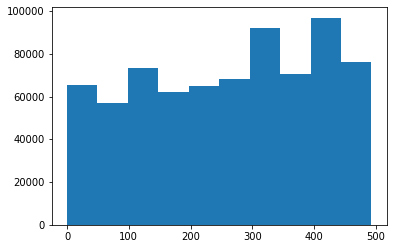

In [20]:
import matplotlib.pyplot as plt
plt.hist(r.data['channel'])

Si può usare una selezione per gardare ad un PMT particolare

In [28]:
selection_str = "channel == 141"
r = st.get_array(run_id, 'raw_records', selection_str=selection_str, seconds_range=(0,60))

In [30]:
r.nbytes/1e6

16.205504

Nel tutorial di strax sono indicate le funzioni supportate.
Invece di usare selection string si può usare la funzione keep_columns

In [32]:
r = st.get_array(run_id, 'raw_records', keep_columns=['channel'], seconds_range=(0,60))
r

array([(172,), (424,), (353,), ..., (119,), (282,), (374,)],
      dtype=[(('Channel/PMT number', 'channel'), '<i2')])

C'è un altro modo sviluppato di recente in strax, è una funzione per guardare risultati accumulati https://github.com/AxFoundation/strax/pull/253, ad esempio se si vuole guardare i valori di baseline medi o altri valori.

In [33]:
acc = st.accumulate(run_id,'raw_records',seconds_range=(0,60),selection_str='(channel == 126) & (record_i == 0)')
acc['n_rows']

4802

In [34]:
acc

{'n_rows': 4802,
 'start': 1589187292000000000,
 'length': 500612,
 'dt': 48030,
 'channel': 605178,
 'pulse_length': 503958,
 'record_i': 0,
 'baseline': 0,
 'data': array([76809076, 76809245, 76808819, 76808995, 76809021, 76809126,
        76808909, 76808821, 76808758, 76809030, 76808807, 76808996,
        76808761, 76809114, 76808898, 76809095, 76808688, 76808827,
        76808728, 76808988, 76808937, 76808893, 76808907, 76808968,
        76808911, 76809050, 76808799, 76808995, 76808881, 76809040,
        76809021, 76809145, 76808846, 76808832, 76808788, 76809068,
        76809090, 76809276, 76808919, 76808982, 76808818, 76809082,
        76808852, 76809105, 76808685, 76809021, 76808733, 76808846,
        76808735, 76799283, 76405100, 76319239, 76586600, 76707346,
        76741976, 76755179, 76763738, 76768988, 76774146, 76778766,
        76780697, 76782057, 76784342, 76786783, 76786844, 76788997,
        76789878, 76791278, 76792593, 76793707, 76798634, 76802039,
        76802823, 

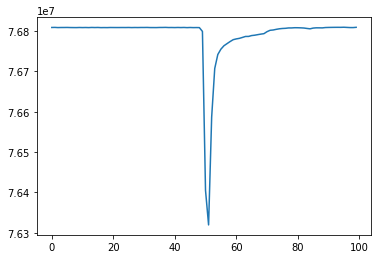

In [38]:
plt.plot(acc['data'][:100])

Si ottiene una raw pulse shape media nel plot, si trovano altri esempi in github nella pull request relativa, può essere utile per estrarre per parametri medi o su tutto il run.
L'opzione record_i==0 è legata alla lunghezza degli impulsi digitalizzati, alcune volte ce n'è più di una quindi è meglio prendere soltanto la prima.

Si passa ad un altra domanda.

Someone announces on gitter that the straxen processing algorithms have just been updated. Looking in your notebook, you see the data you want to load is not available anymore. What is the most likely cause? What options do you have for accessing the data anyway?


Potrebbe essere che i dati non sono più nei context di straxen, con straxen.contexts. e premendo tab vedo tutti i possibili dati che ci sono in contexts.
Oppure potrebbe essere un problema di configurazione (st.show_config)

In [42]:
st.config

{'n_tpc_pmts': 494,
 'n_top_pmts': 253,
 'gain_model': ('to_pe_constant', '1300V_20200428'),
 'channel_map': immutabledict({'tpc': (0, 493), 'he': (500, 752), 'aqmon': (790, 807), 'tpc_blank': (999, 999), 'mv': (1000, 1083), 'mv_blank': (1999, 1999)})}

In [45]:
st.key_for(run_id, 'peak_basics')

007695-peak_basics-k3obsu3syl

In [46]:
st.lineage(run_id, 'peak_basics')

{'peak_basics': ('PeakBasics', '0.0.7', {'n_top_pmts': 253}),
 'peaks': ('Peaks', '0.1.1', {}),
 'lone_hits': ('Peaklets',
  '0.3.3',
  {'n_tpc_pmts': 494,
   'gain_model': ('to_pe_constant', '1300V_20200428'),
   'peaklet_gap_threshold': 350,
   'peak_left_extension': 30,
   'peak_right_extension': 200,
   'peak_min_pmts': 4,
   'peak_split_gof_threshold': (None,
    ((0.5, 1), (3.5, 0.25)),
    ((2, 1), (4.5, 0.4))),
   'peak_split_filter_wing_width': 70,
   'peak_split_min_area': 40.0,
   'peak_split_iterations': 20,
   'tight_coincidence_window_left': 50,
   'tight_coincidence_window_right': 50,
   'hit_min_amplitude': 'pmt_commissioning_initial'}),
 'pulse_counts': ('PulseProcessing',
  '0.2.1',
  {'n_tpc_pmts': 494,
   'hev_gain_model': ('disabled', None),
   'baseline_samples': 40,
   'tail_veto_threshold': 0,
   'tail_veto_duration': 3000000,
   'tail_veto_resolution': 1000,
   'tail_veto_pass_fraction': 0.05,
   'tail_veto_pass_extend': 3,
   'pmt_pulse_filter': None,
   'save

In [48]:
!/project2/lgrandi/xenonnt/development/print_versions

Welcome XENON analyst! Testing your software versions now.
	Python 3.6.10 at /opt/XENONnT/anaconda/envs/XENONnT_development/bin/python
	Strax 0.11.0 at /opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/strax
	Straxen 0.9.0 at /opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.6/site-packages/straxen


Terza domanda:
    
Why can you not load peak_basics and event_info together in one get_array or get_df call? How else can you compute e.g. the sum area of S2s in an event?

In [49]:
st.is_stored(run_id,'event_info')

False

Perché questo c'è solo con XENON1T, cambiamo temporaneamente

In [50]:
st2 = straxen.contexts.xenon1t_dali()
run_id2 = '180215_1029'

In [51]:
st2.is_stored(run_id2,'event_info')

True

Se si prova adesso ad aprire contemporaneamente:

In [53]:
st.get_df(run_id,['peak_basics','event_info'])

RuntimeError: Cannot automerge different data kinds!

non si può fare l'automerge di different "data kinds". Per fare ad esempio la somma di S2s di un evento (come è chiesto nella terza domanda) bisogna sfruttare il tempo dell'evento

In [62]:
event = st2.get_array(run_id2,'event_info')[0]#prendo il primo evento
event['time'], event['endtime']

(1518690592149882940, 1518690592152169100)

In questo modo si può fare ma c'è un modo per non farlo manualmente con degli shortucuts. 

In [63]:
print(len(st2.get_array(run_id2,'peak_basics', time_within=event)))

9


Si può fare anche con un loop su più eventi. Ma c'è un modo pià efficiente

In [67]:
events = st2.get_array(run_id2, 'event_info')
peaks = st2.get_array(run_id2, 'peak_basics')

In [70]:
import strax
list_stuff = strax.split_by_containment(peaks,events)

In [71]:
list_stuff[3]#peaks in event 3

array([(1518690592748771050, 1518690592748771350, 1518690592748771145, 1.0103599e+03, 182,  56, 2.7695480e+01,   47.07978,  132.19673, 0.37675372,  30, 10,  36.42012 , 276, 1),
       (1518690592748771350, 1518690592748771840, 1518690592748771554, 2.4573624e+01, 178, 200, 1.2931608e+00,  183.36884,  416.6307 , 0.45271638,  49, 10, 163.78032 ,   3, 2),
       (1518690592748771850, 1518690592748773330, 1518690592748772522, 7.8354782e+01,  37,  57, 7.4767056e+00,  395.02188,  890.03564, 0.560763  , 148, 10, 299.5564  ,   8, 2),
       (1518690592748773970, 1518690592748774280, 1518690592748774163, 1.2960687e+01,   5, 142, 7.3353405e+00,  135.71082,  236.3359 , 0.24105954,  31, 10, 224.86192 ,   2, 2),
       (1518690592748774940, 1518690592748775240, 1518690592748775039, 4.7856078e+00,   2, 119, 3.2236874e+00,  195.01266,  230.3824 , 1.        ,  30, 10,   8.103132,   1, 0),
       (1518690592748777700, 1518690592748778020, 1518690592748777898, 3.3031166e+00,   2, 119, 2.3444009e+00,  234

Per un evento va bene anche la funzione con time_within, split_by_cont è meglio su più eventi

In [73]:
strax.fully_contained_in(peaks,events)[:100]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int32)

Nel prossimo tutorial si parlerà si high-level processing, guarderemo il processing attualmente utilizzato, energy estimations e definizione di eventi, ci sono molti plugins e verrano proposti diversi esercizi per capire il funzionamento. Poi come si definisce un picco (low-level) si vedrà la settimana successiva. C'è un esercizio anche per questa settimana